# Introduction

In this project we are focused on building the advanced regression model using regularisation to understand the variables which are significant in predicting the price of a house & how well those variables describe the price of a house which will then be used by the management to manipulate strategy as per price variation with variables.

---

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

<b>The company wants to know:</b>
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

---

# Business Objective

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

---

# Solution Approach

1. Reading, Understanding & Cleaning the Data
2. Visualising the Data
3. Data Preparation for modelling
4. Splitting the Data into Training and Testing Sets
5. Model Building and Evaluation
6. Ridge Regression
7. Lasso Regression
8. Model Comparison
9. Conclusion

----

# <u>Importing required libraries</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# <u>Step 1: Reading, Understanding & Cleaning the Data</u>

In [2]:
# Loading data from csv

housesale_data = pd.read_csv("train.csv")

## Data Understanding

In [3]:
# Checking rows and columns in dataset
housesale_data.shape

(1460, 81)

In [4]:
# Checking general information about dataset, mostly to see various datatypes available in dataset
housesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Quick data view & also checking if any extra header rows present
housesale_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Checking if any extra rows present at bottom eg. total rows
housesale_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
# Checking the columns via describe

housesale_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

In [8]:
# Checking if any blank rows in dataset, if yes we would have to remove it
blank_rows = housesale_data[housesale_data.isnull().all(axis=1)]

# Print the blank rows
print(blank_rows)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


- There are no blank rows in data set as well

In [9]:
# Checking duplicate rows in data

print(housesale_data.duplicated().sum())

0


- There are no duplicate rows in data set

In [10]:
# Get columns with all unique values
unique_value_columns = housesale_data.columns[housesale_data.nunique() == len(housesale_data)]

unique_value_columns

Index(['Id'], dtype='object')

In [11]:
# Lets drop the ID column as it cannot be used for analysis
housesale_data = housesale_data.drop('Id',axis='columns')

In [12]:
# Checking shape of housesale_data after to verify if column count is as expected
housesale_data.shape

(1460, 80)

#### Handling NULL Values in Columns

In [13]:
# Checking % of null present in all columns to see if any columns we can drop

null_percent_per_column = ((housesale_data.isnull().sum() / len(housesale_data)) * 100)

null_percent_per_column.round(2).sort_values(ascending=False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
Heating         0.00
HeatingQC       0.00
MSZoning        0.00
1stFlrSF        0.00
SalePrice       0.00
Length: 80, dtype: float64

In [14]:
# Dropping columns with more than 80% NULL Values in it

cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
housesale_data.drop(cols_to_drop, axis = 1, inplace=True)

# Checking shape of housesale_data after to verify if column count is as expected
housesale_data.shape

(1460, 76)

In [15]:
# Check remaining columns and NULL values in it
housesale_data.isna().sum().sort_values(ascending = False).head(20)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
Fireplaces        0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
dtype: int64

In [16]:
# Accoridng to the data defination - NA value have a real meaning in few variables
# e.g. FireplaceQu NA means 'No Fireplace', GarageType NA means 'No Garage'
# So replacing 'NA' values with 'None' value in such vaiables makes sense so python does not consider them as NULL

columns_having_meaningful_NA_value = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                                    'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

for col in columns_having_meaningful_NA_value:
    housesale_data[col] = housesale_data[col].fillna('None')
    

In [17]:
# Check remaining columns and NULL values in it
housesale_data.isna().sum().sort_values(ascending = False).head(20)

LotFrontage     259
GarageYrBlt      81
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
MSSubClass        0
GarageType        0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
dtype: int64

In [18]:
# Checking values in LotFrontage, GarageYrBlt, MasVnrType, MasVnrArea, Electrical column
housesale_data[['GarageYrBlt', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical']]

,GarageYrBlt,LotFrontage,MasVnrType,MasVnrArea,Electrical
0,2003.0,65.0,BrkFace,196.0,SBrkr
1,1976.0,80.0,None,0.0,SBrkr
2,2001.0,68.0,BrkFace,162.0,SBrkr
3,1998.0,60.0,None,0.0,SBrkr
4,2000.0,84.0,BrkFace,350.0,SBrkr
...,...,...,...,...,...
1455,1999.0,62.0,None,0.0,SBrkr
1456,1978.0,85.0,Stone,119.0,SBrkr
1457,1941.0,66.0,None,0.0,SBrkr
1458,1950.0,68.0,None,0.0,FuseA


In [19]:
# Filling LotFrontage Continuous variables with median value
housesale_data['LotFrontage']= housesale_data['LotFrontage'].fillna(housesale_data['LotFrontage'].median())

# Filling GarageYrBlt Continuous variables with median value
housesale_data['GarageYrBlt']= housesale_data['GarageYrBlt'].fillna(0.0)

# Filling MasVnrType with None (No Masonry veneer)
housesale_data['MasVnrType']= housesale_data['MasVnrType'].fillna('None')

# Filling MasVnrArea with 0 (No Masonry veneer - zero area)
housesale_data['MasVnrArea']= housesale_data['MasVnrArea'].fillna(0)

# Filling Electrical with mode value (SBrkr)
housesale_data['Electrical']= housesale_data['Electrical'].fillna(housesale_data['Electrical'].mode()[0])

# Columns left with null values = ['LotFrontage', 'MasVnrArea' , 'MasVnrType', 'Electrical']

In [20]:
# Check remaining columns and NULL values in it
housesale_data.isna().sum().sort_values(ascending = False).head(20)

MSSubClass      0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
MSZoning        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
dtype: int64

#### All Null values are handled now

In [21]:
# Get columns and number of unique values in housesale_data
unique_value_counts_per_column = housesale_data.nunique()

unique_value_counts_per_column.sort_values()

CentralAir        2
Street            2
Utilities         2
LandSlope         3
HalfBath          3
               ... 
TotalBsmtSF     721
1stFlrSF        753
BsmtUnfSF       780
GrLivArea       861
LotArea        1073
Length: 76, dtype: int64

- There are no columns with only 1 (single) value in it so we would need all columns

## Derived Features

In [22]:
# we can calculate property age at the time of sale generally older properties have low value, age of property can be important variable
housesale_data['houseAge'] = housesale_data['YrSold'] - housesale_data['YearBuilt']
housesale_data.shape

(1460, 77)

## Managing Outliers

In [23]:
numeric_columns = housesale_data.select_dtypes(exclude=object).columns
print('Total number of Numeric columns: ' + str(len(numeric_columns)))

Total number of Numeric columns: 38


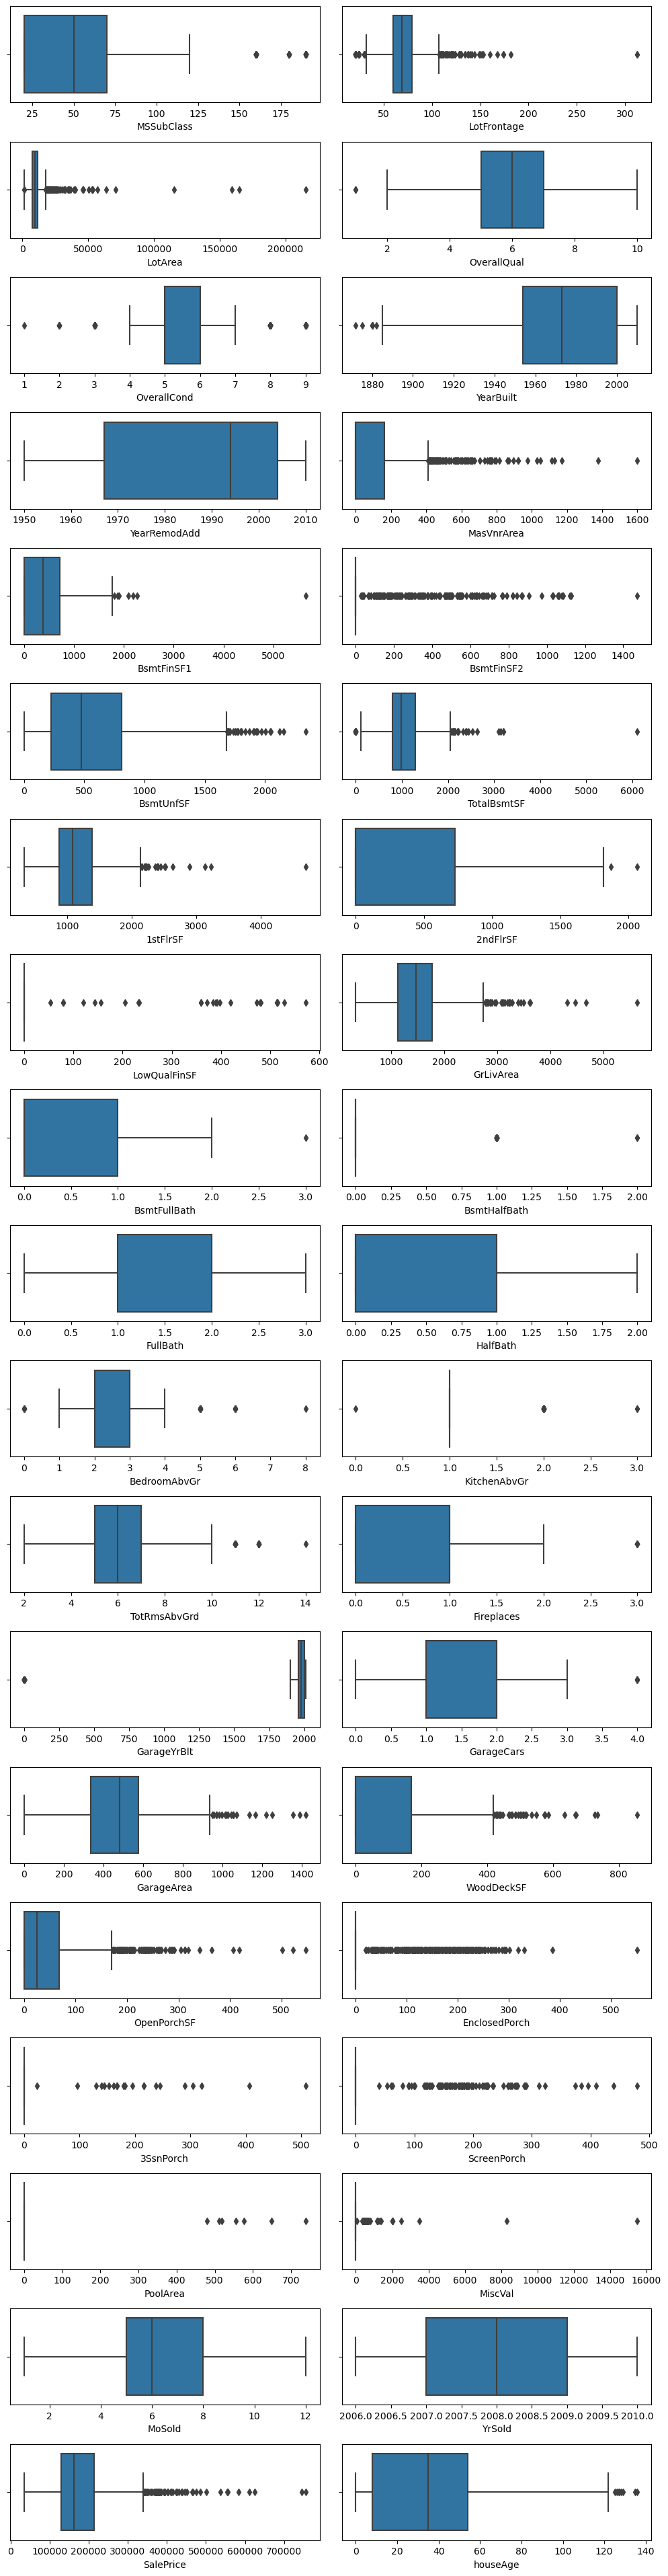

In [24]:
# Outlier Analysis using Box Plot features to visualize outliers
plt.figure(figsize = (10, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(20, 2, plotCounter)
    sns.boxplot(housesale_data[col])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

<b>Observation:</b>

Lot of outliers are visible in LotFrontage, LotArea, MasVnrArea, BsmtFinSF2, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal


In [25]:
# Based on above observations, we can drop few columns

cols_to_drop = ['PoolArea', 'MiscVal', '3SsnPorch']
housesale_data.drop(cols_to_drop, axis = 1, inplace=True)
housesale_data.shape

(1460, 74)

In [26]:
# Drop outliers for all numeric features using IQR method

numerical_columns = housesale_data.select_dtypes(exclude=object).columns

def drop_outlier_rows(dataset, col):
    Q1 = dataset[col].quantile(.05)
    Q3 = dataset[col].quantile(.95)
    IQR = Q3 - Q1
    lower_Range = Q1 - (1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)
    dataset = dataset[(dataset[col] >= lower_Range) & (dataset[col] <= upper_Range)]
    return dataset

for col in numerical_columns:
    housesale_data = drop_outlier_rows(housesale_data, col)

# Data after removing rows
housesale_data.shape

(1275, 74)

#### Checking Correlated Variables

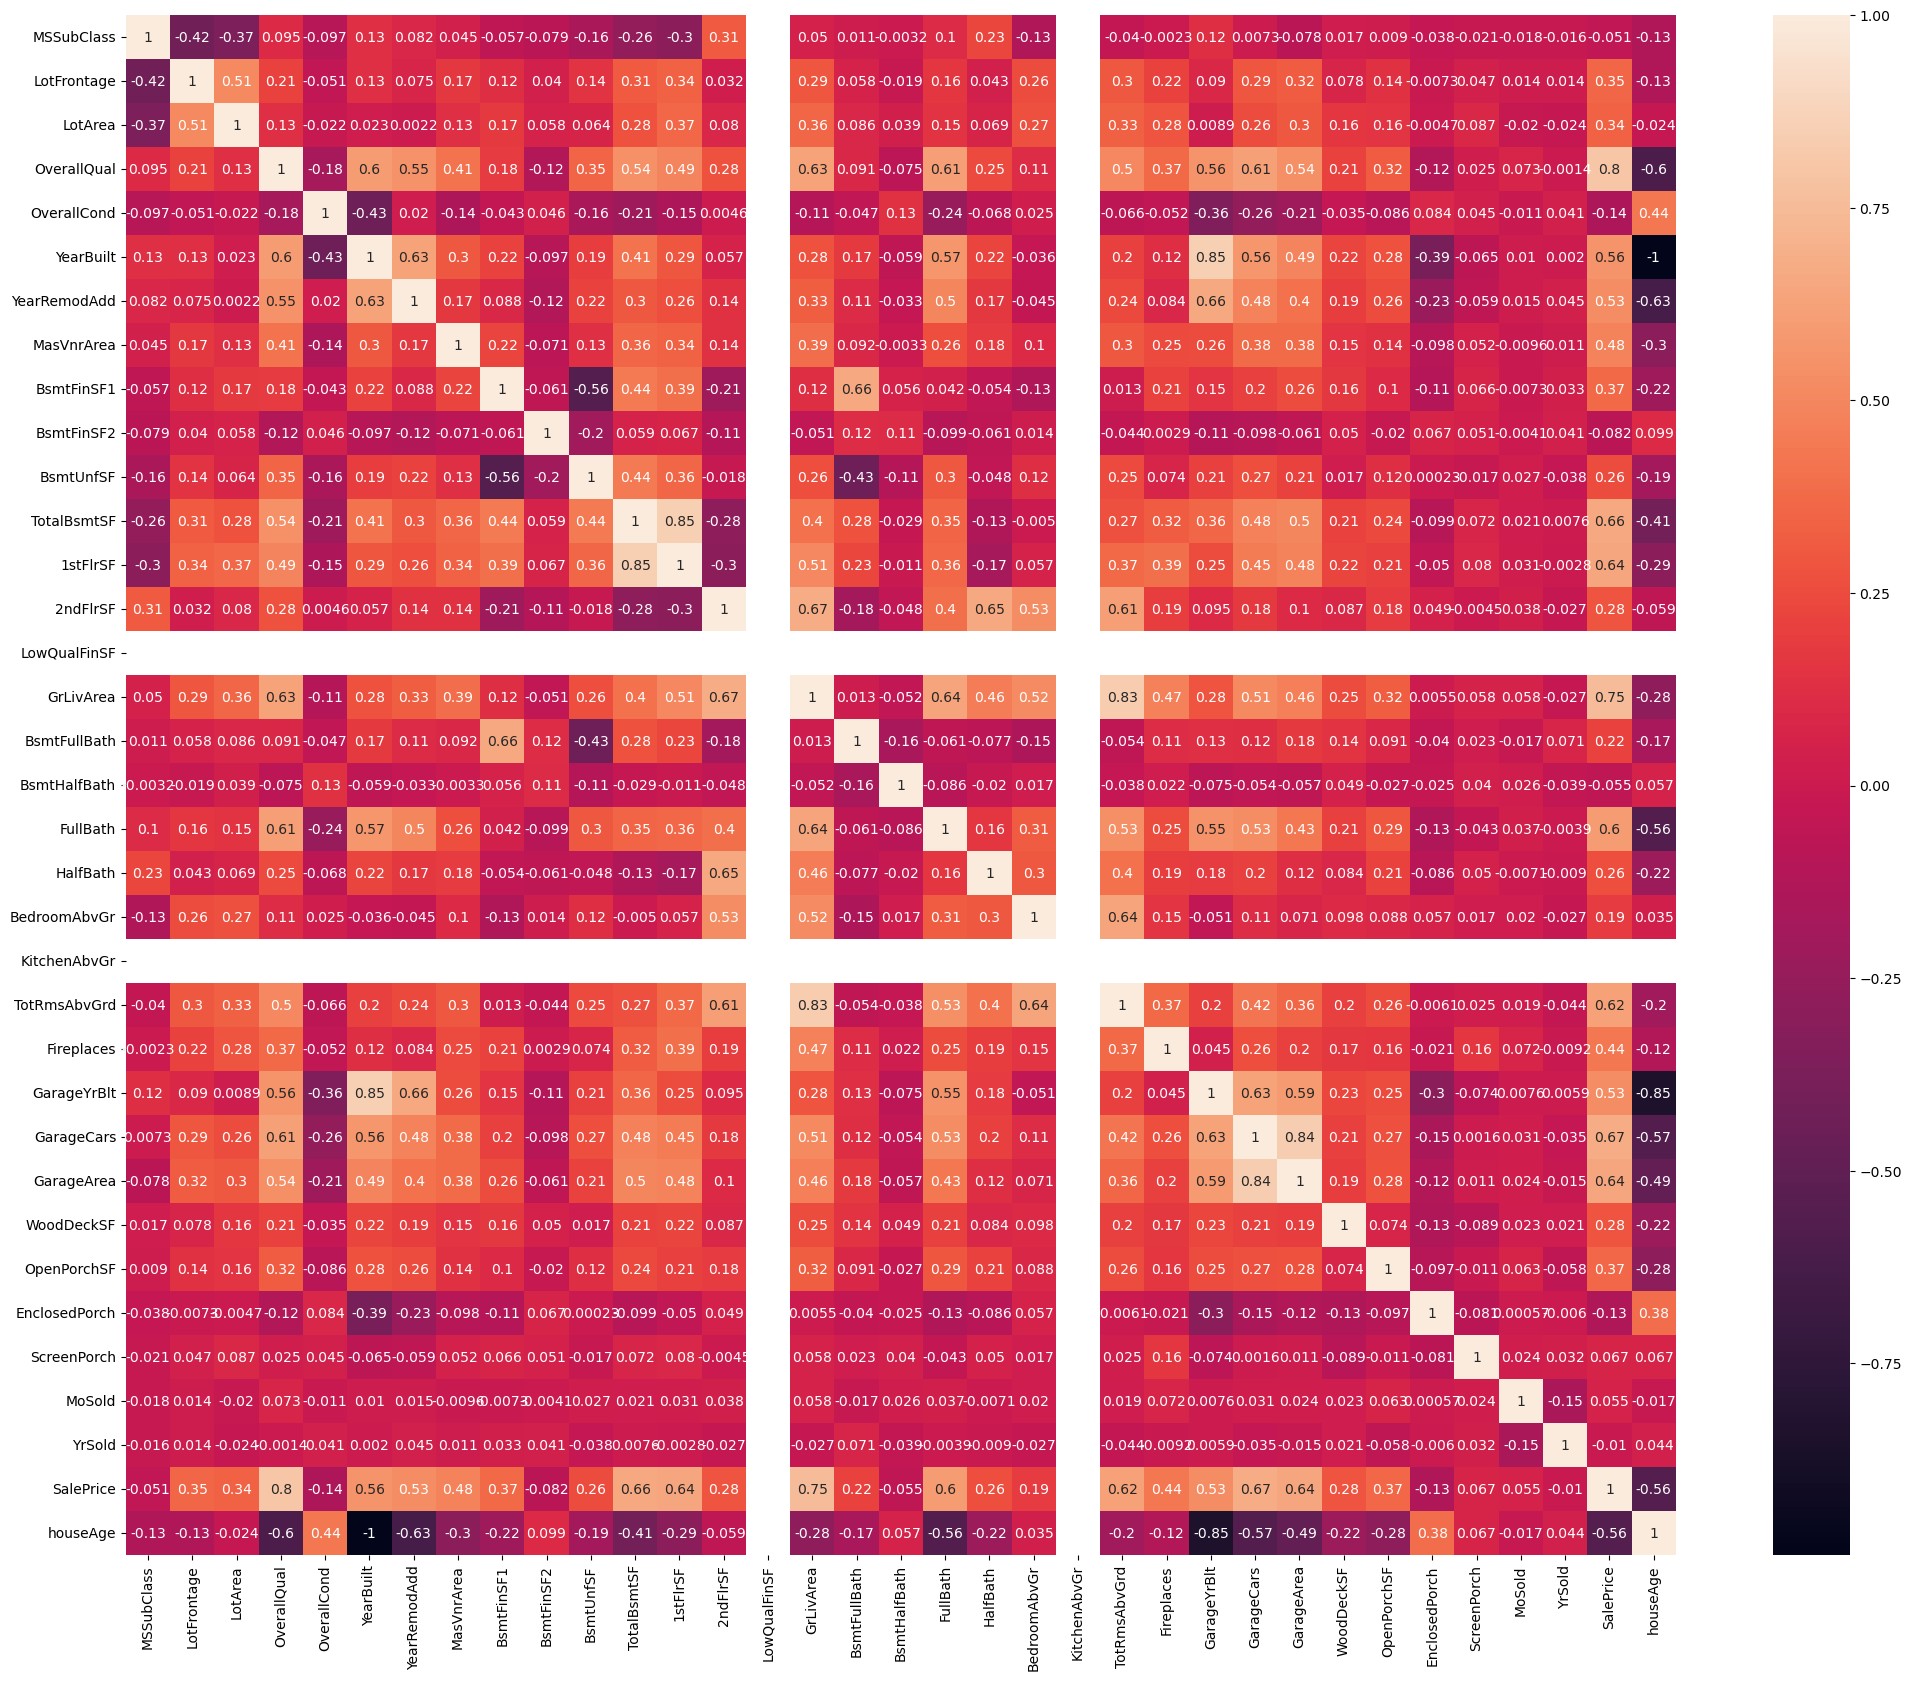

In [27]:
# plot correlation graph

plt.figure(figsize = (25, 20))

# mask = np.triu(np.ones_like(housesale_data.corr(), dtype=np.bool))
sns.heatmap(housesale_data.corr(),  annot = True)

plt.show()

<b>Observations:</b>
    
- 1stFlrSF is related to TotalBsmtSf 
- TotRmsAbvGrd is related to GrLivArea 
- GarageYrBlt is realted to YearBlt 
- GarageArea is related to GarageCars 
- SalePrice is related to OverallQual, GrLivArea, GarageCars, GarageArea, TotalRmsAbvGrd, TotalBsmtSf, 1stFlrSf, FullBath

In [28]:
# According to above observations, removing some of the correlated columns

col_names_related = ['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']
housesale_data.drop(col_names_related, axis = 1, inplace=True)
housesale_data.shape

(1275, 71)

# <u>Step 2: Visualising the Data</u>

### Performing Exploratory Data Analysis

### Analysing Target Variable - SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

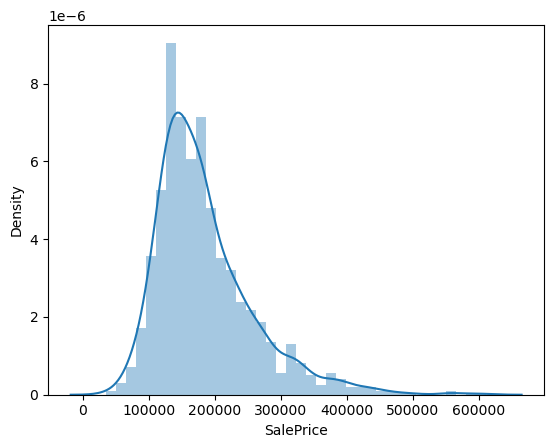

In [29]:
sns.distplot(housesale_data['SalePrice'])

<b>Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data</b>

In [30]:
#Log Transformation
housesale_data['SalePrice']=np.log1p(housesale_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

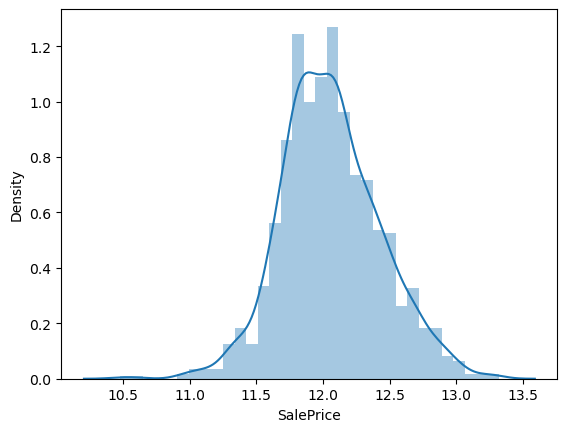

In [31]:
sns.distplot(housesale_data['SalePrice'])

### Analysing Numerical Variables

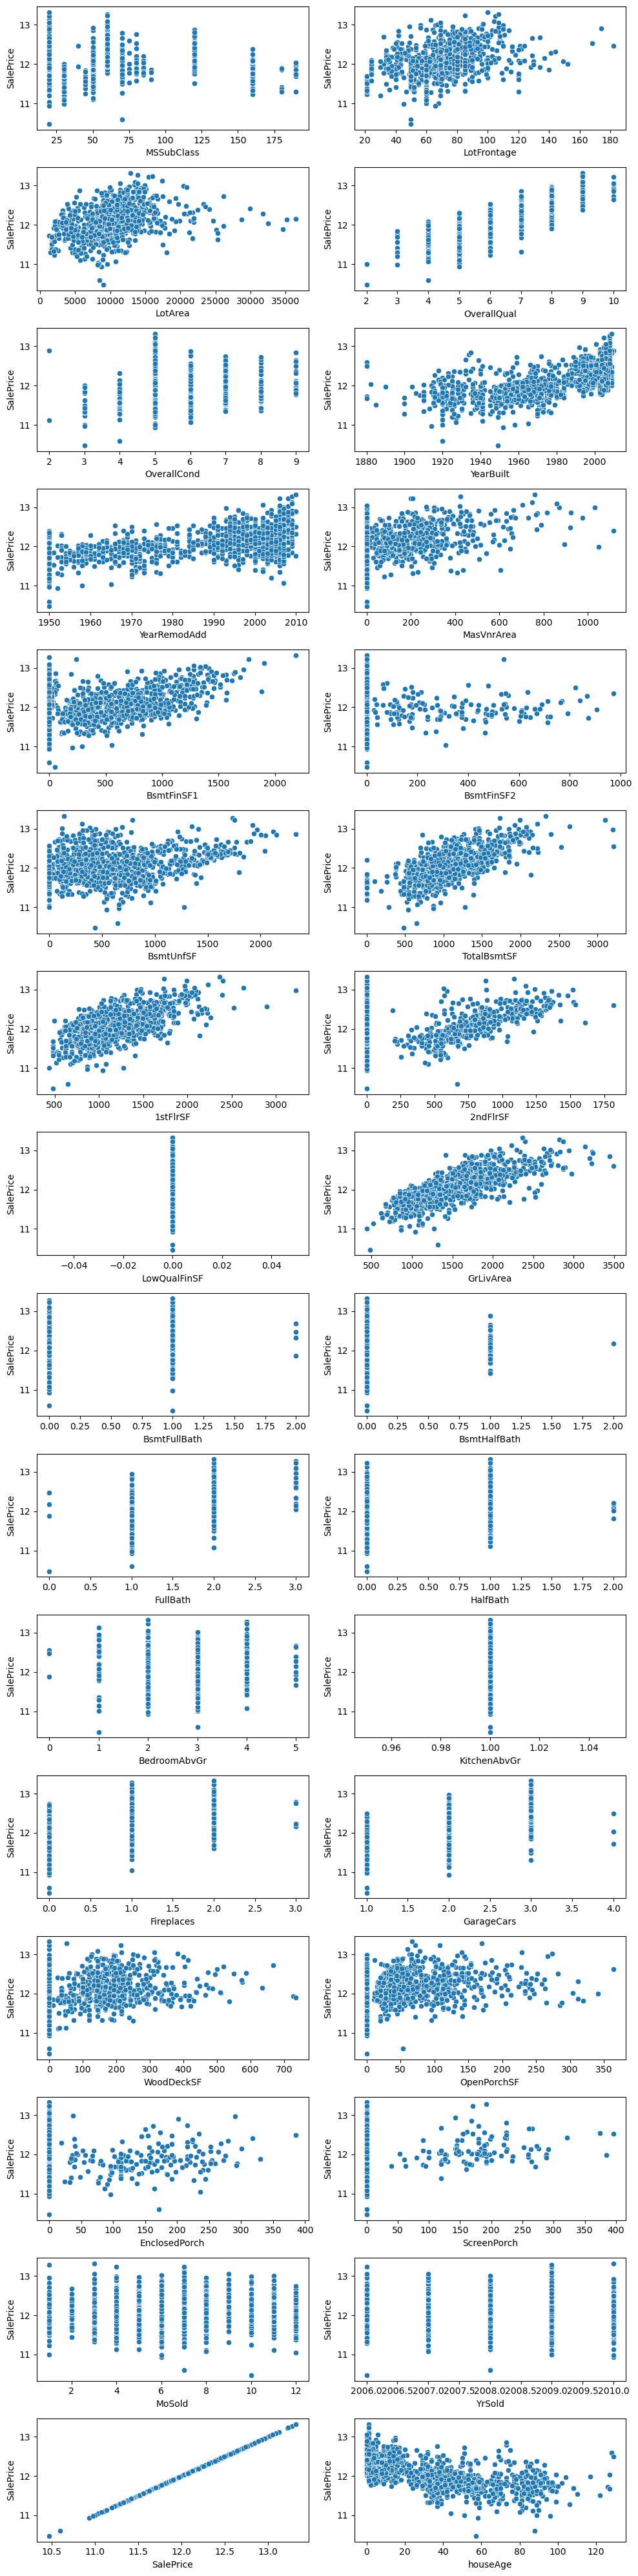

In [32]:
numeric_columns = housesale_data.select_dtypes(exclude=object).columns

# Plotting Scatter plots to understand feature trend with sale price
plt.figure(figsize=(10, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(16, 2, plotCounter)
    sns.scatterplot(x = col, y = 'SalePrice', data = housesale_data)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()


<b>Observations:</b>
    
- LotFrontage, LotArea, GrLivArea, GarageArea are few of the features that show a linear trend with salePrice
- KitchenAbvGr, LowQualFinSF features have single vertical bar in graph - that shows all values for these features are same, and these can be dropped

In [33]:
# Based on above observations, few features can be dropped
col_names_with_all_values_same = ['LowQualFinSF', 'KitchenAbvGr']
housesale_data.drop(col_names_with_all_values_same, axis = 1, inplace=True)
housesale_data.shape

(1275, 69)

### Analysing Categorical Variables

In [34]:
category_columns = housesale_data.select_dtypes(include=object).columns
print('Total Category Columns present are :' + str(len(category_columns)))

Total Category Columns present are :39


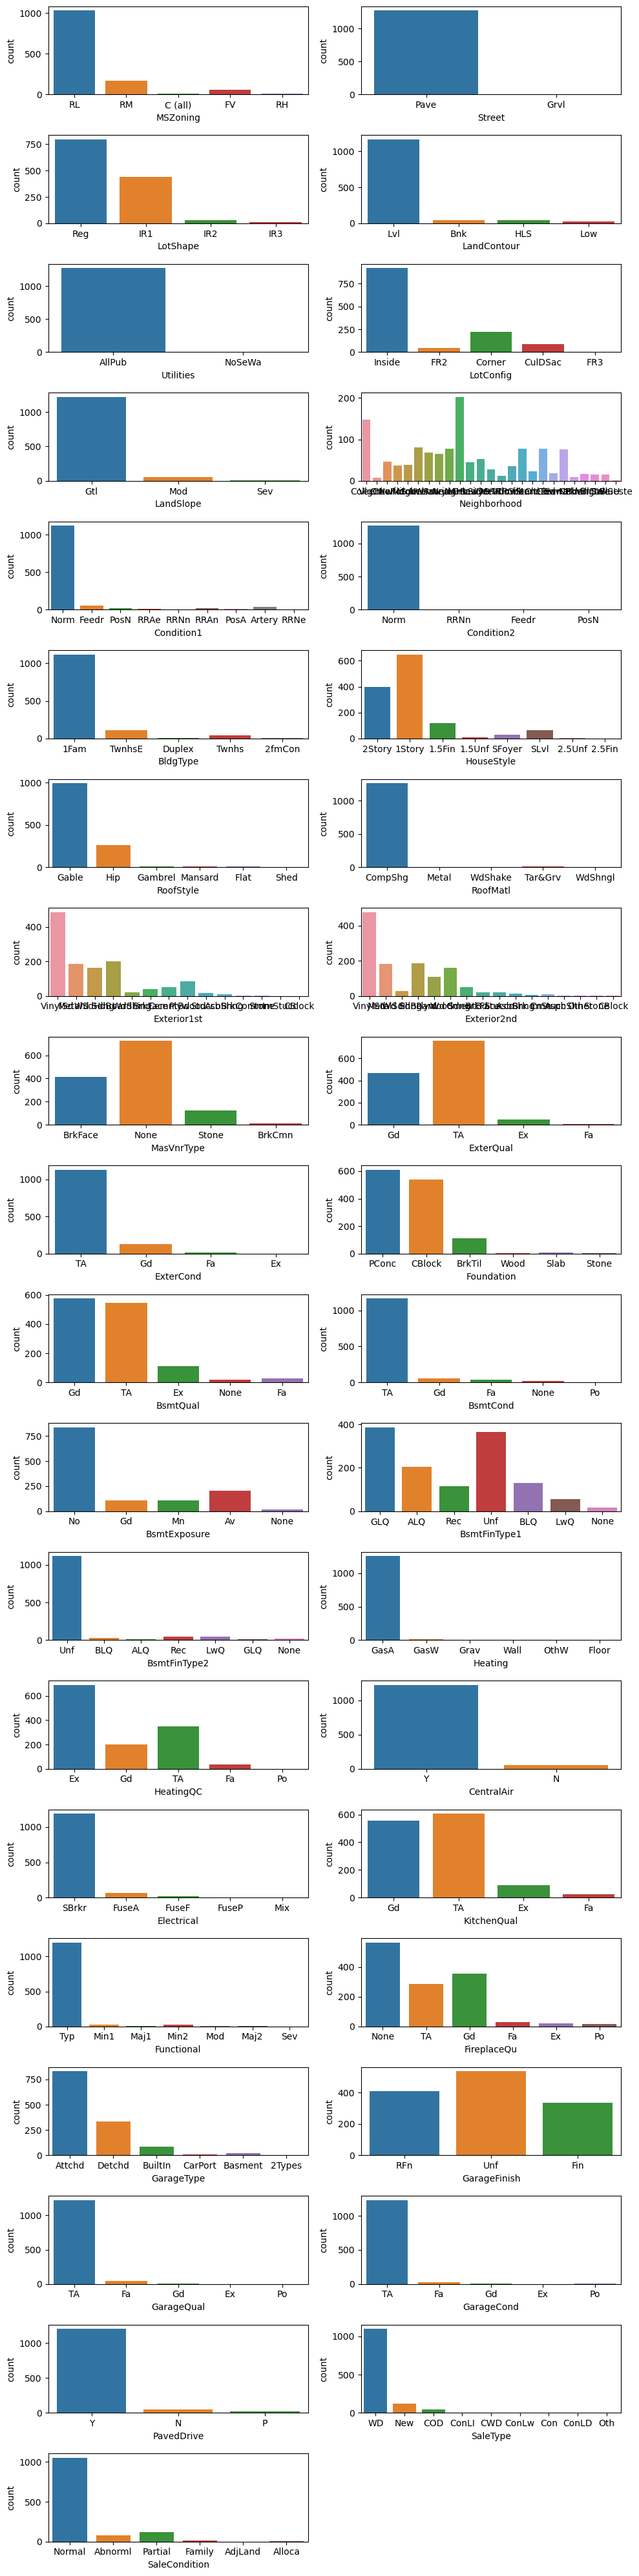

In [35]:
# Plotting histogram plots to understand feature distribution
plt.figure(figsize=(10, 40))

plotCounter = 1
for col in category_columns:
    plt.subplot(20, 2, plotCounter)
    sns.countplot(col, data = housesale_data)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

<b>Observations:</b>

Street, Utilities, Condition2, Heating, CentralAir, Functional, GarageQual are feature majorly dominated by single category

In [36]:
# Based on above observations, few columns can be dropped
columns_to_drop_aftr_catvar_analysis = ['Street', 'Utilities', 'Condition2', 'Heating', 'CentralAir', 'Functional', 'GarageQual']
housesale_data.drop(columns_to_drop_aftr_catvar_analysis, axis = 1, inplace=True)

# Data after removing variables
housesale_data.shape

(1275, 62)

# <u>Step 3: Data Preparation for modelling</u>

## Creating dummy variables

In [37]:
# Create Dummy variables for all categorical columns

cat_columns = housesale_data.select_dtypes(include=object).columns
cat_columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [38]:
for col in cat_columns:
    datasetCol = pd.get_dummies(housesale_data[col], prefix = col, drop_first=True)
    housesale_data = pd.concat([housesale_data, datasetCol], axis = 1)
    housesale_data.drop(col, axis = 1, inplace = True)

housesale_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
housesale_data.shape

(1275, 206)

In [40]:
column_names = housesale_data.columns
print("Column Names:")
for column_name in column_names:
    print(column_name)

Column Names:
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
Fireplaces
GarageCars
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
MoSold
YrSold
SalePrice
houseAge
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_SawyerW
Neighborhood_Somerst
Neigh

# <u>Step 4: Splitting the Data into Training and Testing Sets</u>

In [41]:
# Splitting data in training & test sets
y = housesale_data.pop('SalePrice')
X = housesale_data


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [43]:
# Printing train & test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 205)
(383, 205)
(892,)
(383,)


## Rescaling required variables

In [44]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
82,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,0,0,0,0,1,0,0,0,1,0
772,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,0,0,0,0,1,0,0,0,0,0
587,85,74.0,8740,5,6,1982,1982,0.0,672,0,...,0,0,0,0,1,0,0,0,1,0
52,90,110.0,8472,5,5,1963,1963,0.0,104,712,...,0,0,0,0,1,0,0,0,1,0
1116,80,69.0,7750,8,5,2002,2002,0.0,353,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# Using MinMaxScaler to Rescaling the features/variables
scaler = MinMaxScaler()

In [46]:
# Rescaling all numeric columns
numeric_columns = X_train.select_dtypes(exclude=object).columns

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
82,0.000000,0.387755,0.253011,0.750,0.333333,0.984496,0.950000,0.419731,0.015082,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
772,0.352941,0.496599,0.185199,0.500,0.333333,0.744186,0.433333,0.000000,0.192870,0.130658,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
587,0.382353,0.360544,0.211364,0.375,0.500000,0.790698,0.533333,0.000000,0.307130,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52,0.411765,0.605442,0.203750,0.375,0.333333,0.643411,0.216667,0.000000,0.047532,0.732510,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1116,0.352941,0.326531,0.183239,0.750,0.333333,0.945736,0.866667,0.000000,0.161335,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
# Transfoming the test X_test columns, here we just transform and not fit & tranform
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
119,0.235294,0.299320,0.203437,0.500,0.333333,0.968992,0.933333,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
586,0.058824,0.231293,0.254744,0.500,0.666667,0.294574,0.833333,0.000000,0.095978,0.623457,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1188,0.235294,0.319728,0.216903,0.625,0.333333,0.945736,0.866667,0.085202,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
164,0.117647,0.129252,0.116477,0.500,0.666667,0.356589,0.900000,0.000000,0.169104,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1249,0.000000,0.265306,0.167614,0.375,0.666667,0.542636,0.000000,0.000000,0.244059,0.098765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# <u>Step 5: Model Building and Evaluation</u>

In [48]:
# Common function for regression
def calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test):
    metric = []
    
    r2_train = r2_score(y_train, y_pred_train)
    print('R2 score train : ', r2_train)
    metric.append(r2_train)

    r2_test = r2_score(y_test, y_pred_test)
    print('R2 score test  : ', r2_test)
    metric.append(r2_test)

    rss_train = np.sum(np.square(y_train - y_pred_train))
    print('RSS score train : ', rss_train)
    metric.append(rss_train)

    rss_test = np.sum(np.square(y_test - y_pred_test))
    print('RSS score test  : ', rss_test)
    metric.append(rss_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    print('MSE score train : ', mse_train)
    metric.append(mse_train ** 0.5)

    mse_test = mean_squared_error(y_test, y_pred_test)
    print('MSE score test  : ', mse_test)
    metric.append(mse_test ** 0.5)
    
    return metric

In [49]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe = RFE(lm, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)

In [50]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 82),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 22),
 ('MasVnrArea', False, 98),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 38),
 ('FullBath', False, 37),
 ('HalfBath', False, 52),
 ('BedroomAbvGr', False, 71),
 ('Fireplaces', False, 26),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('MoSold', False, 103),
 ('YrSold', True, 1),
 ('houseAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 44),
 ('LotShape_IR3', False, 24),
 ('LotShape_Reg', False, 91),
 ('LandContour_HLS', False, 49),
 ('

In [51]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'houseAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_BrkSide',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_Sawyer',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe',
       'Condition1_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMa

In [52]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'MasVnrArea', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'MoSold', 'LotShape_IR2',
       ...
       'FireplaceQu_Po', 'FireplaceQu_TA', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageCond_Gd', 'PavedDrive_P', 'PavedDrive_Y',
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_WD'],
      dtype='object', length=105)

In [53]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [54]:
X_train_rfe = pd.DataFrame(X_train[col])

In [55]:
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
82,0.387755,0.253011,0.750,0.333333,0.984496,0.015082,0.000000,0.710636,0.505171,0.457317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
772,0.496599,0.185199,0.500,0.333333,0.744186,0.192870,0.130658,0.222945,0.332579,0.276016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,0.360544,0.211364,0.375,0.500000,0.790698,0.307130,0.000000,0.078031,0.271493,0.171545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
52,0.605442,0.203750,0.375,0.333333,0.643411,0.047532,0.732510,0.000000,0.263736,0.153659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1116,0.326531,0.183239,0.750,0.333333,0.945736,0.161335,0.000000,0.025546,0.131868,0.138618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
X_train_rfe.shape

(892, 100)

In [57]:
# predict
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_linear_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9508914613356603
R2 score test  :  -3.052066742037474e+20
RSS score train :  5.900438126945226
RSS score test  :  1.7127352827872698e+22
MSE score train :  0.006614840949490164
MSE score test  :  4.471893688739608e+19


## Since the Test R2 is too low, we will check for some alternate methods of Regression

In [58]:
######################################################################

# add constant
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# create model
lr = sm.OLS(y_train, X_train_sm)
 
#fit
lm = lr.fit()

# summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     70.96
Date:                Wed, 27 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:03:59   Log-Likelihood:                 972.53
No. Observations:                 892   AIC:                            -1561.
Df Residuals:                     700   BIC:                            -640.7
Df Model:                         191                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.1151      0.132     46.264      0.000       5.856       6.375
MSSubClass               -0.0090      0.111     -0.081      0.935      -0.226       0.209
LotFrontage               0.0763      0.038      1.990      0.047       0.001       0.152
LotArea                   0.2989      0.050      5.983      0.000       0.201       0.397
OverallQual               0.3048      0.045      6.760      0.000       0.216       0.393
OverallCond               0.2639      0.028      9.392      0.000       0.209       0.319
YearBuilt                 3.1307      0.072     43.767      0.000       2.990       3.271
YearRemodAdd              0.0254      0.019      1.303      0.193      -0.013       0.064
MasVnrArea               -0.0044      0.035     -0.125      0.900      -0.073       0.065
BsmtFinSF1                0.2526      0.035      7.298      0.000       0.185       0.321
BsmtFinSF2                0.0482      0.050      0.963      0.336      -0.050       0.147
BsmtUnfSF                 0.0901      0.032      2.849      0.005       0.028       0.152
TotalBsmtSF               0.2565      0.044      5.850      0.000       0.170       0.343
1stFlrSF                  0.2770      0.048      5.748      0.000       0.182       0.372
2ndFlrSF                  0.2467      0.048      5.087      0.000       0.151       0.342
GrLivArea                 0.3698      0.034     10.856      0.000       0.303       0.437
BsmtFullBath              0.0439      0.021      2.121      0.034       0.003       0.085
BsmtHalfBath              0.0227      0.031      0.730      0.466      -0.038       0.084
FullBath                  0.0496      0.039      1.260      0.208      -0.028       0.127
HalfBath                  0.0212      0.024      0.888      0.375      -0.026       0.068
BedroomAbvGr              0.0274      0.035      0.778      0.437      -0.042       0.096
Fireplaces               -0.0357      0.042     -0.858      0.391      -0.117       0.046
GarageCars                0.1290      0.026      5.046      0.000       0.079       0.179
WoodDeckSF                0.0487      0.021      2.275      0.023       0.007       0.091
OpenPorchSF               0.0617      0.024      2.627      0.009       0.016       0.108
EnclosedPorch             0.0657      0.028      2.350      0.019       0.011       0.121
ScreenPorch               0.1141      0.025      4.495      0.000       0.064       0.164
MoSold                   -0.0010      0.014     -0.072      0.943      -0.029       0.027
YrSold                   -0.0985      0.012     -8.541      0.000      -0.121      -0.076
houseAge                  2.8391      0.071     39.830      0.000       2.699       2.979
MSZoning_FV               0.5903      0.071      8.264      0.000       0.450       0.731
MSZoning_RH            

In [59]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lm.predict(X_train_sm)
y_pred_test = lm.predict(X_test_sm)

metric_linear_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9508910258702564
R2 score test  :  0.8083494213544091
RSS score train :  5.9004904485321
RSS score test  :  10.754899409367816
MSE score train :  0.00661489960597769
MSE score test  :  0.02808067730905435


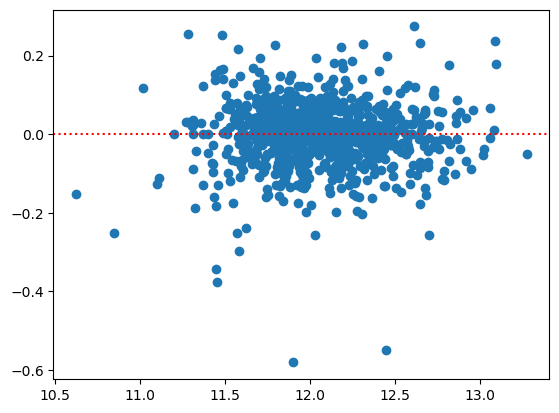

In [60]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

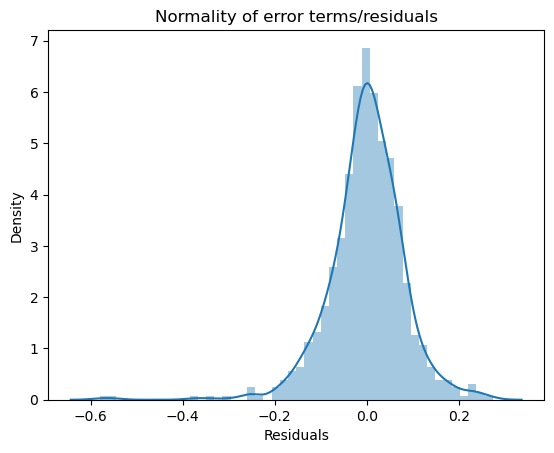

In [61]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

######################################################################

# <u>Step 6: Ridge Regression</u>

Let's now try predicting house prices using ridge regression.

In [62]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004133,0.000823,0.002000,0.000103,0.0001,{'alpha': 0.0001},-0.087678,-0.080307,-0.078248,-0.072746,...,-0.082490,0.007283,23,-0.054765,-0.055240,-0.057751,-0.056376,-0.053702,-0.055567,0.001389
1,0.003077,0.000020,0.001755,0.000007,0.001,{'alpha': 0.001},-0.087635,-0.080304,-0.078240,-0.072716,...,-0.082465,0.007273,22,-0.054769,-0.055243,-0.057752,-0.056379,-0.053700,-0.055569,0.001390
2,0.003045,0.000031,0.001749,0.000007,0.01,{'alpha': 0.01},-0.087221,-0.080278,-0.078166,-0.072443,...,-0.082231,0.007184,21,-0.054805,-0.055272,-0.057763,-0.056412,-0.053681,-0.055587,0.001397
3,0.003038,0.000014,0.001739,0.000002,0.05,{'alpha': 0.05},-0.085720,-0.080241,-0.077919,-0.071465,...,-0.081416,0.006894,19,-0.054950,-0.055399,-0.057822,-0.056566,-0.053802,-0.055708,0.001379
4,0.003088,0.000038,0.001760,0.000018,0.1,{'alpha': 0.1},-0.084417,-0.080223,-0.077656,-0.070561,...,-0.080678,0.006675,17,-0.055149,-0.055536,-0.057945,-0.056761,-0.054050,-0.055888,0.001345


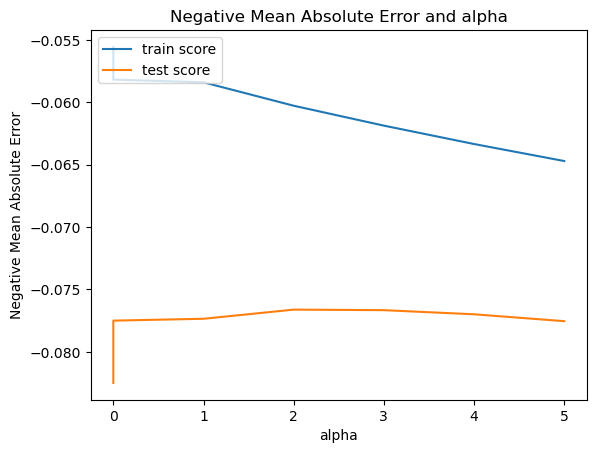

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


### Since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [65]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 2.0}


In [66]:
# Fitting Ridge model for best alpha
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.68726997e-02  8.52225184e-02  1.82158898e-01  3.01463131e-01
  2.37502329e-01  1.01194187e-01  3.05816029e-02  1.84603892e-02
  2.22175219e-01  1.19626422e-02  8.44496532e-02  2.19640327e-01
  2.56757564e-01  1.81344785e-01  3.14667242e-01  4.62048738e-02
  1.85863992e-02  9.97115296e-02  4.31502559e-02  6.83668310e-02
  6.94289485e-03  1.18278781e-01  5.09015340e-02  5.29772069e-02
  6.36617189e-02  9.39079224e-02  3.62113411e-03 -1.04056985e-02
 -1.01516844e-01  1.54994525e-01  1.13941600e-01  1.57098775e-01
  1.19149100e-01 -9.11048167e-03 -2.67125118e-02  1.50170880e-03
  1.59647142e-02 -3.16254637e-02 -6.17337174e-04  2.23351585e-02
 -5.31042915e-02 -4.56362382e-02 -1.13328172e-02  1.69685815e-03
 -2.89222815e-02 -1.99983327e-02 -2.51306232e-02  5.65706538e-02
  2.32662044e-02 -6.05368017e-03  1.20473063e-01 -6.56544931e-02
 -3.30231186e-02 -4.52121744e-02 -1.39140475e-01 -2.11961714e-02
 -1.86216836e-02  1.27455513e-02 -1.62382890e-02  2.95036260e-02
  6.04314440e-02 -3.32345

In [67]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 10.86),
 ('MSSubClass', -0.027),
 ('LotFrontage', 0.085),
 ('LotArea', 0.182),
 ('OverallQual', 0.301),
 ('OverallCond', 0.238),
 ('YearBuilt', 0.101),
 ('YearRemodAdd', 0.031),
 ('MasVnrArea', 0.018),
 ('BsmtFinSF1', 0.222),
 ('BsmtFinSF2', 0.012),
 ('BsmtUnfSF', 0.084),
 ('TotalBsmtSF', 0.22),
 ('1stFlrSF', 0.257),
 ('2ndFlrSF', 0.181),
 ('GrLivArea', 0.315),
 ('BsmtFullBath', 0.046),
 ('BsmtHalfBath', 0.019),
 ('FullBath', 0.1),
 ('HalfBath', 0.043),
 ('BedroomAbvGr', 0.068),
 ('Fireplaces', 0.007),
 ('GarageCars', 0.118),
 ('WoodDeckSF', 0.051),
 ('OpenPorchSF', 0.053),
 ('EnclosedPorch', 0.064),
 ('ScreenPorch', 0.094),
 ('MoSold', 0.004),
 ('YrSold', -0.01),
 ('houseAge', -0.102),
 ('MSZoning_FV', 0.155),
 ('MSZoning_RH', 0.114),
 ('MSZoning_RL', 0.157),
 ('MSZoning_RM', 0.119),
 ('LotShape_IR2', -0.009),
 ('LotShape_IR3', -0.027),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.016),
 ('LandContour_Low', -0.032),
 ('LandContour_Lvl', -0.001),
 ('LotConfig_CulDSac'

In [68]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_ridge_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9438791899472095
R2 score test  :  0.9162025474138433
RSS score train :  6.742969274933689
RSS score test  :  4.702480836188794
MSE score train :  0.007559382595217139
MSE score test  :  0.012278017849056903


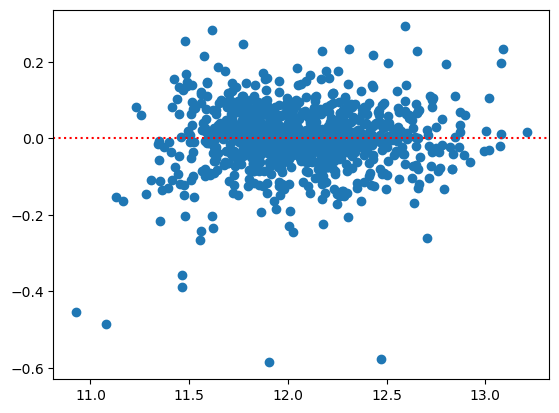

In [69]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

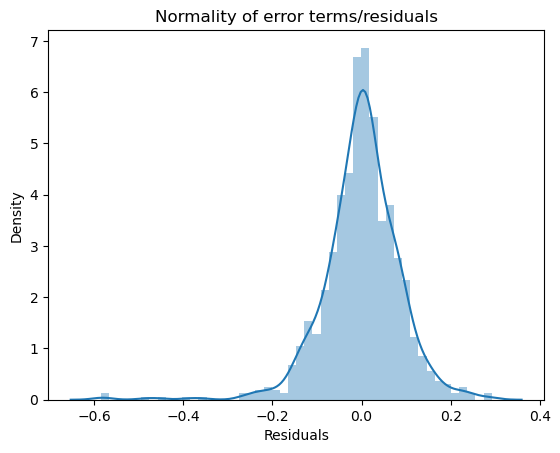

In [70]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [71]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [72]:
params_ridge = pd.DataFrame(mod_ridge)
params_ridge.columns = ['Variable', 'Coeff']
res=params_ridge.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,10.860
15,GrLivArea,0.315
4,OverallQual,0.301
13,1stFlrSF,0.257
5,OverallCond,0.238
9,BsmtFinSF1,0.222
12,TotalBsmtSF,0.220
3,LotArea,0.182
14,2ndFlrSF,0.181
32,MSZoning_RL,0.157


In [73]:
# Sorting the coefficients in ascending order
params_ridge = params_ridge.sort_values((['Coeff']), axis = 0, ascending = False)
params_ridge

,Variable,Coeff
0,constant,10.860
15,GrLivArea,0.315
4,OverallQual,0.301
13,1stFlrSF,0.257
5,OverallCond,0.238
...,...,...
172,KitchenQual_Fa,-0.073
74,Condition1_RRAe,-0.074
187,GarageCond_Fa,-0.077
29,houseAge,-0.102


In [74]:
## since there were few coefficients at 0, we removed them from features
params_ridge = pd.DataFrame(params_ridge[(params_ridge['Coeff'] != 0)])
params_ridge

,Variable,Coeff
0,constant,10.860
15,GrLivArea,0.315
4,OverallQual,0.301
13,1stFlrSF,0.257
5,OverallCond,0.238
...,...,...
172,KitchenQual_Fa,-0.073
74,Condition1_RRAe,-0.074
187,GarageCond_Fa,-0.077
29,houseAge,-0.102


In [75]:
params_ridge.shape

(195, 2)

# <u>Step 7: Lasso Regression</u>

In [76]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027771,0.000857,0.001880,0.000085,0.0001,{'alpha': 0.0001},-0.078032,-0.078334,-0.074540,-0.067567,...,-0.077275,0.006578,2,-0.056894,-0.057914,-0.059570,-0.058706,-0.055950,-0.057807,0.001281
1,0.013004,0.003908,0.001913,0.000157,0.001,{'alpha': 0.001},-0.077007,-0.081393,-0.070231,-0.070887,...,-0.076706,0.005499,1,-0.069834,-0.069231,-0.070810,-0.070027,-0.067658,-0.069512,0.001055
2,0.004184,0.000169,0.001727,0.000013,0.01,{'alpha': 0.01},-0.112321,-0.120350,-0.121254,-0.109409,...,-0.116854,0.004984,3,-0.114051,-0.113486,-0.113332,-0.114039,-0.115898,-0.114161,0.000915
3,0.003367,0.000061,0.001726,0.000011,0.05,{'alpha': 0.05},-0.197261,-0.200358,-0.204136,-0.194692,...,-0.200246,0.003886,4,-0.198534,-0.201461,-0.197727,-0.199131,-0.200342,-0.199439,0.001323
4,0.002963,0.000027,0.001741,0.000014,0.1,{'alpha': 0.1},-0.269505,-0.268497,-0.263838,-0.260610,...,-0.268298,0.006259,5,-0.268159,-0.268308,-0.268990,-0.266786,-0.268467,-0.268142,0.000733


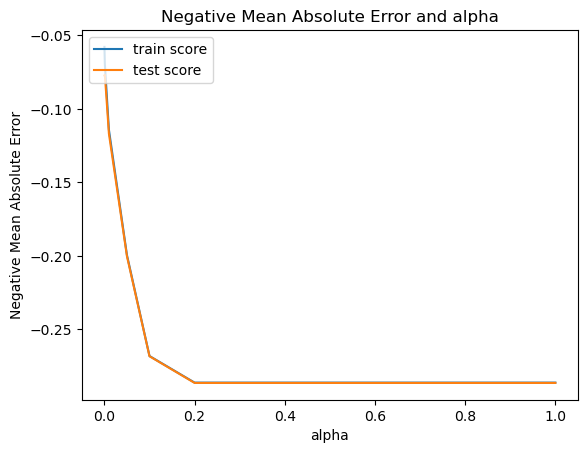

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter,

but we will choose a low value of alpha to balance the trade-off between Bias-Variance

and to get the coefficients of smallest of features.

In [79]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [80]:
# At alpha = 0.001 even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00000000e+00,  5.33894076e-02,  1.12989426e-01,  4.28539335e-01,
        2.26870783e-01,  0.00000000e+00,  2.69620793e-02,  0.00000000e+00,
        1.58066285e-01,  0.00000000e+00,  0.00000000e+00,  3.05025092e-01,
        5.94237999e-04,  0.00000000e+00,  8.45116020e-01,  2.90608819e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.11497236e-01,  1.76344279e-02,  2.68106797e-02,
        0.00000000e+00,  4.68777194e-02,  0.00000000e+00, -0.00000000e+00,
       -2.12380436e-01,  5.90186640e-02,  0.00000000e+00,  7.66063164e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -7.22640041e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  9.03057970e-03,
       -4.34458642e-03, -0.00000000e+00, -8.88354658e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  4.01037769e-02,
        0.00000000e+00, -0.00000000e+00,  8.94014707e-02, -3.33014610e-02,
       -0.00000000e+00, -

### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [81]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.095),
 ('MSSubClass', -0.0),
 ('LotFrontage', 0.053),
 ('LotArea', 0.113),
 ('OverallQual', 0.429),
 ('OverallCond', 0.227),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.027),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.158),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.305),
 ('1stFlrSF', 0.001),
 ('2ndFlrSF', 0.0),
 ('GrLivArea', 0.845),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('Fireplaces', 0.0),
 ('GarageCars', 0.111),
 ('WoodDeckSF', 0.018),
 ('OpenPorchSF', 0.027),
 ('EnclosedPorch', 0.0),
 ('ScreenPorch', 0.047),
 ('MoSold', 0.0),
 ('YrSold', -0.0),
 ('houseAge', -0.212),
 ('MSZoning_FV', 0.059),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.077),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.007),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0),
 ('LotConfig_CulDSac', 0.009),
 ('LotConfig_FR2', -0.004),

In [82]:
# prediction on the test set(Using R2)
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [83]:
# Calculate score metrics - R2 Score, RSS, RSME
metric_lasso_regression = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9257001586027866
R2 score test  :  0.9134285266323114
RSS score train :  8.927197365871685
RSS score test  :  4.8581511956299845
MSE score train :  0.010008068795820274
MSE score test  :  0.012684467873707531


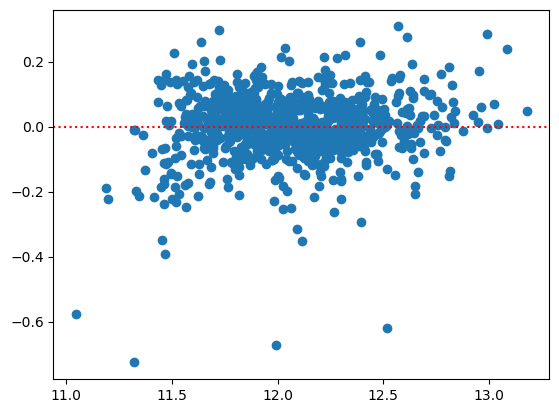

In [84]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

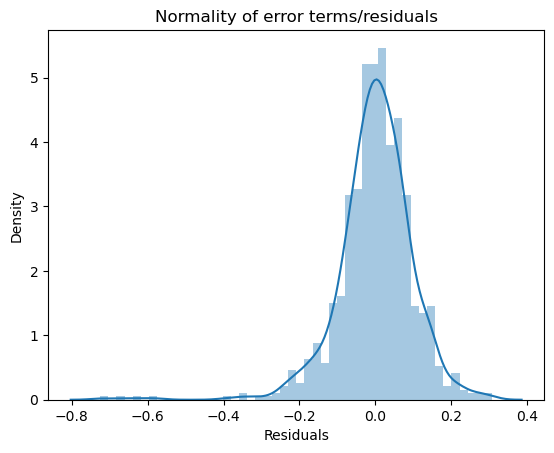

In [85]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [86]:
# Create a dataframe for Ridge Coefficients
mod_lasso = list(zip(cols, model_parameters))

In [87]:
params_lasso = pd.DataFrame(mod_lasso)
params_lasso.columns = ['Variable', 'Coeff']
res=params_lasso.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.095
15,GrLivArea,0.845
4,OverallQual,0.429
12,TotalBsmtSF,0.305
5,OverallCond,0.227
9,BsmtFinSF1,0.158
3,LotArea,0.113
22,GarageCars,0.111
205,SaleCondition_Partial,0.098
51,Neighborhood_Crawfor,0.089


In [88]:
# Sorting the coefficients in ascending order
params_lasso = params_lasso.sort_values((['Coeff']), axis = 0, ascending = False)
params_lasso

,Variable,Coeff
0,constant,11.095
15,GrLivArea,0.845
4,OverallQual,0.429
12,TotalBsmtSF,0.305
5,OverallCond,0.227
...,...,...
167,HeatingQC_TA,-0.026
52,Neighborhood_Edwards,-0.033
177,FireplaceQu_None,-0.033
187,GarageCond_Fa,-0.061


In [89]:
## since there were few coefficients at 0, we removed them from features
params_lasso = pd.DataFrame(params_lasso[(params_lasso['Coeff'] != 0)])
params_lasso

,Variable,Coeff
0,constant,11.095
15,GrLivArea,0.845
4,OverallQual,0.429
12,TotalBsmtSF,0.305
5,OverallCond,0.227
...,...,...
167,HeatingQC_TA,-0.026
52,Neighborhood_Edwards,-0.033
177,FireplaceQu_None,-0.033
187,GarageCond_Fa,-0.061


In [90]:
params_lasso.shape

(62, 2)

# <u>Step 8: Model Comparison</u>

In [91]:
# Creating a table which contain all the metrics

score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}
score_metric = pd.DataFrame(score_table)

lr_metric = pd.Series(metric_linear_regression, name = 'Linear Regression')
rg_3_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression')
ls_100_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression')

score_metric = pd.concat([score_metric, lr_metric, rg_3_metric, ls_100_metric], axis = 1)

score_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.950891,0.943879,0.925700
1,R2 Score (Test),0.808349,0.916203,0.913429
2,RSS (Train),5.900490,6.742969,8.927197
3,RSS (Test),10.754899,4.702481,4.858151
4,RMSE (Train),0.081332,0.086945,0.100040
5,RMSE (Test),0.167573,0.110806,0.112625


<b>Observation:</b>

Though the model performance by Ridge Regression was better in terms of R2 values of Train and Test, it is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.

-----

# <u>Conclusion</u>

In [92]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(20)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,0.845116,0.845116
3,OverallQual,0.428539,0.428539
11,TotalBsmtSF,0.305025,0.305025
4,OverallCond,0.226871,0.226871
28,houseAge,-0.212380,0.212380
8,BsmtFinSF1,0.158066,0.158066
2,LotArea,0.112989,0.112989
21,GarageCars,0.111497,0.111497
204,SaleCondition_Partial,0.098197,0.098197
50,Neighborhood_Crawfor,0.089401,0.089401


Significant top 20 features that affect house price are below, and there significance is as shown by Coefficients above

---

<b>INFERENCE</b>

Surprise Housing can keep track of below predictors affecting the price of the house.

<b>Top 5 Positive Coefficient Variables - suggest a high sale value</b>

- GrLivArea	: Above grade (ground) living area square feet
- OverallQual :	Rates the overall material and finish of the house
- TotalBsmtSF : Total square feet of basement area
- OverallCond : Rates the overall condition of the house
- BsmtFinSF1 : Type 1 (i.e. Rating of basement finished area) finished square feet

<b>Top 2 Negative Coefficient Vaiables - suggest a decrease in sale value</b>

- houseAge : Age of house at time of sale
- GarageCond :	Garage condition

---

## Problem Statement Working

### Question 1: 

### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

In [93]:
# Ridge Regression
# Fitting Ridge model for alpha = 4.0
alpha = 4.0
ridge_double_alpha = Ridge(alpha=alpha)
ridge_double_alpha.fit(X_train, y_train)

Ridge(alpha=4.0)

In [94]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = ridge_double_alpha.predict(X_train)
y_pred_test = ridge_double_alpha.predict(X_test)
metric_ridge_regression_double_aphla = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9390257363109071
R2 score test  :  0.916884362068039
RSS score train :  7.326116394800943
RSS score test  :  4.664219287105405
MSE score train :  0.008213134971749936
MSE score test  :  0.012178118243095053


In [95]:
# Lasso Regression
# Fitting Lasso model for alpha = 200
alpha = 0.002
lasso_double_alpha = Lasso(alpha=alpha)        
lasso_double_alpha.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [96]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_double_alpha.predict(X_train)
y_pred_test = lasso_double_alpha.predict(X_test)
metric_lasso_regression_double_aphla = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9106687336080663
R2 score test  :  0.8996821686816765
RSS score train :  10.733237528202327
RSS score test  :  5.629558712628072
MSE score train :  0.012032777497984672
MSE score test  :  0.014698586717044576


In [97]:
# Model Comparison with double alpha values
score_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','RMSE (Train)','RMSE (Test)']}

score_metric = pd.DataFrame(score_table)

rg_metric = pd.Series(metric_ridge_regression, name = 'Ridge Regression (alpha 2)')
rg_double_alpha_metric = pd.Series(metric_ridge_regression_double_aphla, name = 'Ridge Regression (alpha 4)')
ls_metric = pd.Series(metric_lasso_regression, name = 'Lasso Regression (alpha 0.001)')
ls_double_alpha_metric = pd.Series(metric_lasso_regression_double_aphla, name = 'Lasso Regression (alpha 0.002)')

score_metric = pd.concat([score_metric, rg_metric, rg_double_alpha_metric, ls_metric, ls_double_alpha_metric], axis = 1)

score_metric

,Metric,Ridge Regression (alpha 2),Ridge Regression (alpha 4),Lasso Regression (alpha 0.001),Lasso Regression (alpha 0.002)
0,R2 Score (Train),0.943879,0.939026,0.925700,0.910669
1,R2 Score (Test),0.916203,0.916884,0.913429,0.899682
2,RSS (Train),6.742969,7.326116,8.927197,10.733238
3,RSS (Test),4.702481,4.664219,4.858151,5.629559
4,RMSE (Train),0.086945,0.090626,0.100040,0.109694
5,RMSE (Test),0.110806,0.110355,0.112625,0.121238


In [98]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_double_alpha.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_double_alpha.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
14,GrLivArea,0.808472,0.808472
3,OverallQual,0.427105,0.427105
11,TotalBsmtSF,0.245095,0.245095
8,BsmtFinSF1,0.164093,0.164093
4,OverallCond,0.155187,0.155187
28,houseAge,-0.121032,0.121032
21,GarageCars,0.116971,0.116971
204,SaleCondition_Partial,0.082381,0.082381
31,MSZoning_RL,0.082024,0.082024
65,Neighborhood_Somerst,0.054062,0.054062


### Question 3:

### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Building lasso by removing top 5 suggested variables as they will not be part of incoming data & will see what are next variables

In [100]:
# Top 5 predictor variables in lasso model are as below which we will drop from dataset and rebuild the model
# Note: considering absolute coefficient value of the variables so negatives one to is considered
cols_to_drop = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'OverallCond', 'houseAge']

print('Before :', X_train.shape)
X_train.drop(cols_to_drop, axis = 1, inplace=True)
X_test.drop(cols_to_drop, axis = 1, inplace=True)
print('After :', X_train.shape)

Before : (892, 205)
After : (892, 200)


In [101]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031107,0.012881,0.004703,0.002595,0.0001,{'alpha': 0.0001},-0.083835,-0.089696,-0.079004,-0.076829,...,-0.085485,0.007687,1,-0.065089,-0.064513,-0.066138,-0.064584,-0.062766,-0.064618,0.001093
1,0.007176,0.000914,0.001949,0.000216,0.001,{'alpha': 0.001},-0.084514,-0.093307,-0.081882,-0.083161,...,-0.087840,0.005840,2,-0.080751,-0.077671,-0.081210,-0.080173,-0.077964,-0.079554,0.001458
2,0.004157,0.000599,0.001760,0.000024,0.01,{'alpha': 0.01},-0.130721,-0.133746,-0.140866,-0.128995,...,-0.133445,0.004066,3,-0.129771,-0.127381,-0.129467,-0.129183,-0.131184,-0.129397,0.001220
3,0.006557,0.005600,0.002035,0.000255,0.05,{'alpha': 0.05},-0.197261,-0.200358,-0.204136,-0.194692,...,-0.200246,0.003886,4,-0.198534,-0.201461,-0.197727,-0.199131,-0.200342,-0.199439,0.001323
4,0.002829,0.000085,0.002153,0.000830,0.1,{'alpha': 0.1},-0.269505,-0.268497,-0.263838,-0.260610,...,-0.268298,0.006259,5,-0.268159,-0.268308,-0.268990,-0.266786,-0.268467,-0.268142,0.000733


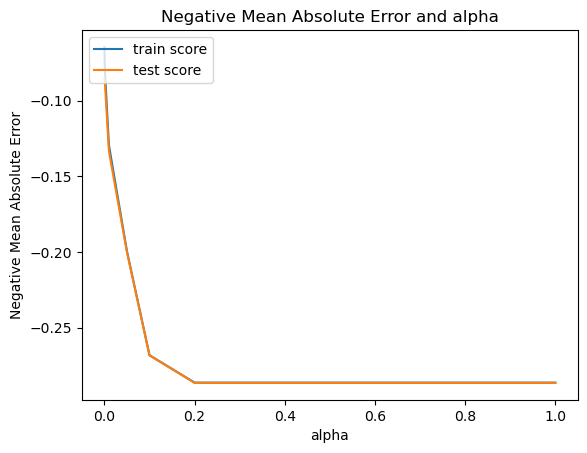

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [102]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [106]:
# Fitting Lasso model for best alpha
alpha = 0.0001
lasso_without_best_5_features = Lasso(alpha=alpha)        
lasso_without_best_5_features.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [107]:
# Calculate score metrics - R2 Score, RSS, RSME
y_pred_train = lasso_without_best_5_features.predict(X_train)
y_pred_test = lasso_without_best_5_features.predict(X_test)
metric_lasso_regression_without_best_5 = calculate_score_metrics(y_train, y_pred_train, y_test, y_pred_test)

R2 score train :  0.9371567076580962
R2 score test  :  0.8989228359694071
RSS score train :  7.550681984072011
RSS score test  :  5.672170360327822
MSE score train :  0.008464890116672659
MSE score test  :  0.014809844282840266


In [108]:
significance_matrix = pd.DataFrame()

significance_matrix['Feature Name'] = X_test.columns
significance_matrix['Coefficient'] = pd.Series(lasso_without_best_5_features.coef_)
significance_matrix['Absolute Coefficient'] = pd.Series(np.abs(lasso_without_best_5_features.coef_))

significance_matrix = significance_matrix.loc[significance_matrix['Coefficient'] != 0]

significance_matrix.sort_values(by=['Absolute Coefficient'], inplace=True, ascending=False)

significance_matrix.head(10)

,Feature Name,Coefficient,Absolute Coefficient
9,1stFlrSF,0.632327,0.632327
24,MSZoning_FV,0.544138,0.544138
26,MSZoning_RL,0.519942,0.519942
25,MSZoning_RH,0.488336,0.488336
10,2ndFlrSF,0.475181,0.475181
27,MSZoning_RM,0.466806,0.466806
6,BsmtFinSF1,0.421492,0.421492
8,BsmtUnfSF,0.262236,0.262236
49,Neighborhood_MeadowV,-0.198378,0.198378
2,LotArea,0.179715,0.179715
